In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_max_min_years_published = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\max_ min years published.csv')
df_Publisher_first_years = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\Publisher_first_years.csv')
df_top_5_race = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\top 5 heroes for each race.csv')
df_top_10_overall_good = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\top 10 heroes by overall aligned good.csv')
df_top_10_overall = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\top 10 heroes by overall.csv')
df_top_10_races_with_more = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\top 10 races with more heroes.csv')
df_top_10_villains_overall = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 4 - SQL\Project SQL\data\data_for_graphs\top 10 villains with the highest overall powerstats.csv')

In [3]:
df_max_min_years_published

,publisher,num_heroes,max_published_year,min_published_year
0,Marvel Comics,121,2008,1939
1,DC Comics,78,2013,1940
2,Dark Horse Comics,12,2004,1979
3,George Lucas,9,2015,1977
4,NaN,3,1986,1933
5,Deadpool,2,2011,2011
6,Giant-Man,1,1962,1962
7,Angel,1,1963,1963
8,Evil Deadpool,1,1991,1991
9,Black Racer,1,1956,1956


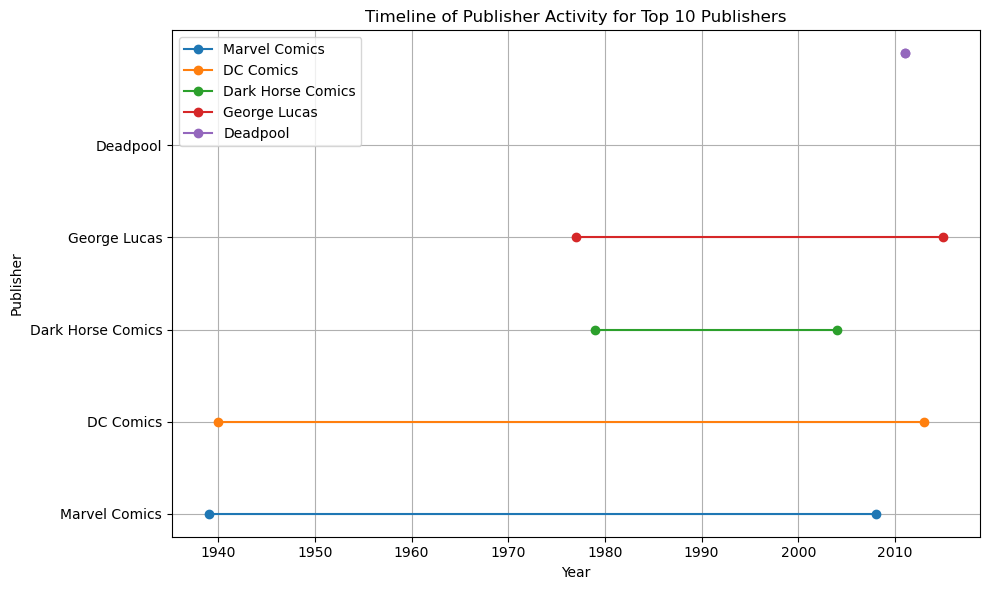

In [4]:
top_publishers = df_max_min_years_published.groupby('publisher')['num_heroes'].sum().nlargest(5).index
df_top_publishers = df_max_min_years_published[df_max_min_years_published['publisher'].isin(top_publishers)]

plt.figure(figsize=(10, 6))

for i, row in df_top_publishers.iterrows():
    plt.plot([row['min_published_year'], row['max_published_year']], [i, i], marker='o', label=row['publisher'])

plt.yticks(range(len(df_top_publishers)), df_top_publishers['publisher'])
plt.xlabel('Year')
plt.ylabel('Publisher')
plt.title('Timeline of Publisher Activity for Top 10 Publishers')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
generation_ranges = [0, 1945, 1964, 1980, 1996, pd.to_datetime('now').year]
generation_labels = ['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z']

df_Publisher_first_years['generation'] = pd.cut(df_Publisher_first_years['year'], bins=generation_ranges, labels=generation_labels, right=False)
df_Publisher_first_years


,character_name,publisher,year,generation
0,A-Bomb,Marvel Comics,2008,Gen Z
1,Abe Sapien,Dark Horse Comics,1993,Millennial
2,Abin Sur,DC Comics,1959,Boomer
3,Abraxas,Marvel Comics,2001,Gen Z
4,Absorbing Man,Marvel Comics,1964,Gen X
...,...,...,...,...
246,Warpath,Thunderbird II,1984,Millennial
247,Winter Soldier,Marvel Comics,2005,Gen Z
248,Wonder Girl,DC Comics,1996,Gen Z
249,Wonder Woman,DC Comics,1941,Silent


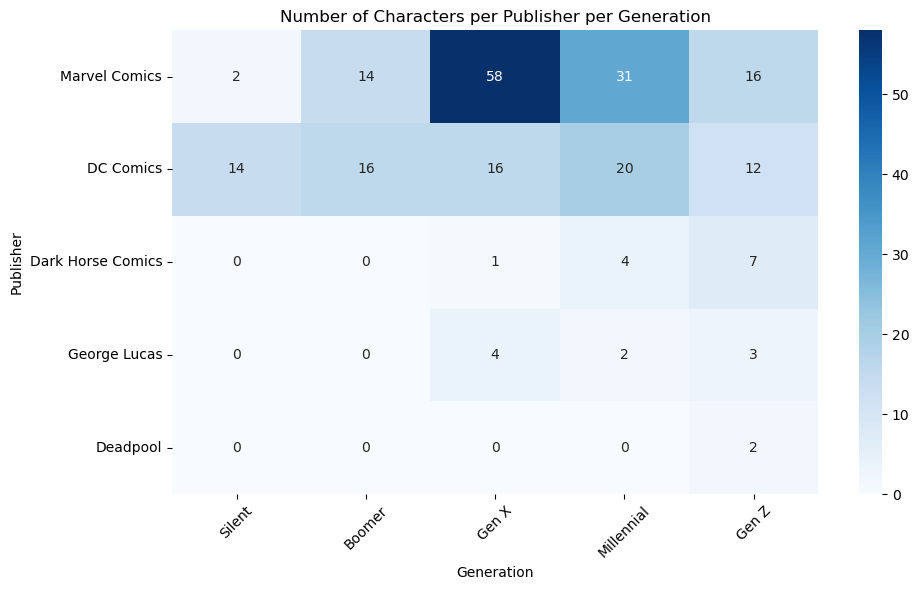

In [12]:
publisher_generation_counts = df_Publisher_first_years.groupby(['publisher', 'generation']).size().reset_index(name='count')

pivot_table = publisher_generation_counts.pivot_table(index='publisher', columns='generation', values='count', fill_value=0)

top_10_publishers = pivot_table.sum(axis=1).nlargest(5).index

top_10_pivot_table = pivot_table.loc[top_10_publishers]

plt.figure(figsize=(10, 6))
sns.heatmap(top_10_pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Number of Characters per Publisher per Generation')
plt.xlabel('Generation')
plt.ylabel('Publisher')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
df_top_5_race

,name,Id,Intelligence,Strength,Speed,Durability,Power,Combat,Overall_ps,race,hero_rank
0,Doomsday,230,75,100,67,100,100,90,532,Alien,1
1,Century,167,88,80,53,64,100,100,485,Alien,2
2,Silver Surfer,598,56,100,100,90,100,32,478,Alien,3
3,Ardina,42,63,100,100,80,100,25,468,Alien,4
4,Indigo,342,75,63,50,50,100,50,388,Alien,5
...,...,...,...,...,...,...,...,...,...,...,...
60,Venompool,690,69,57,63,100,100,100,489,Symbiote,1
61,Anti-Venom,34,75,60,65,90,96,84,470,Symbiote,2
62,Carnage,162,63,63,70,84,88,90,458,Symbiote,3
63,Venom,687,75,57,65,84,86,84,451,Symbiote,4


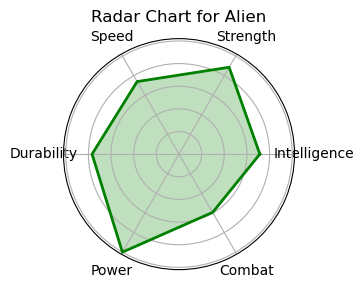

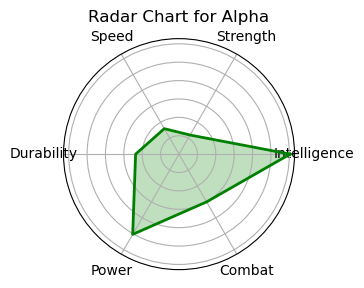

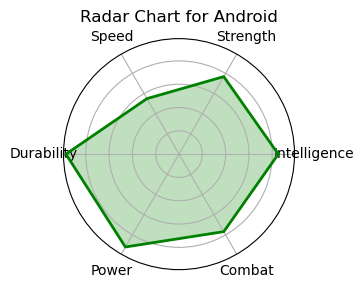

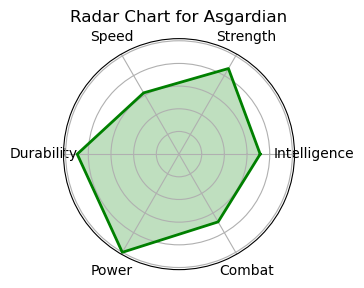

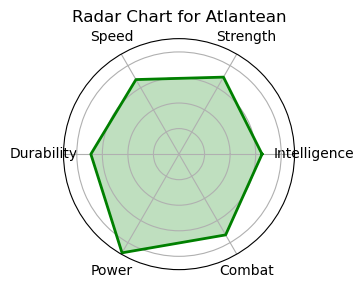

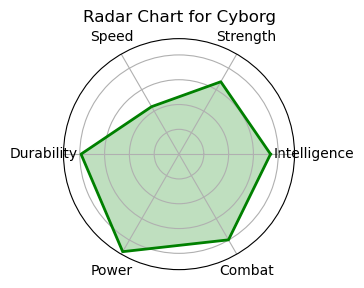

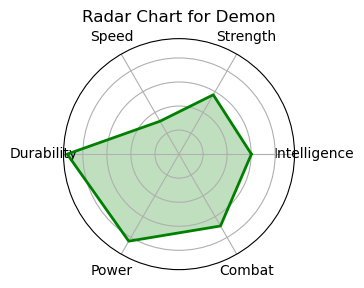

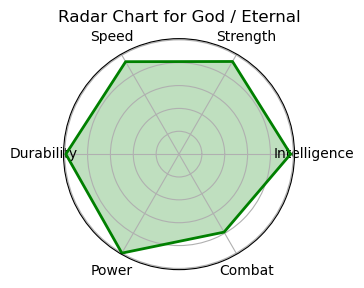

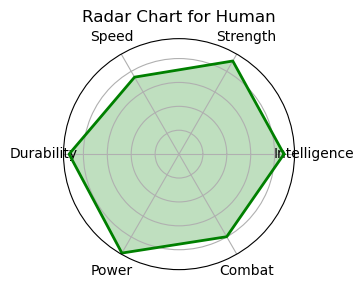

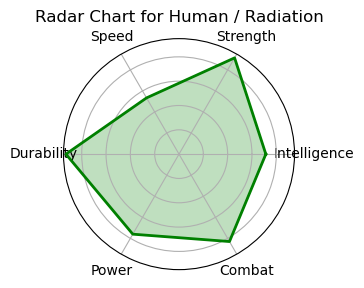

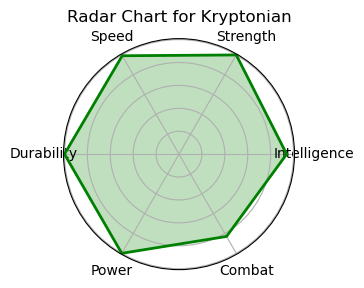

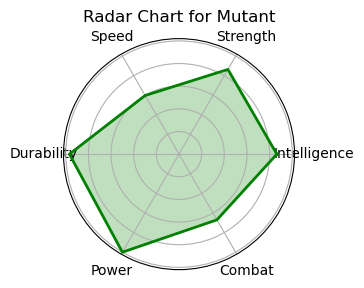

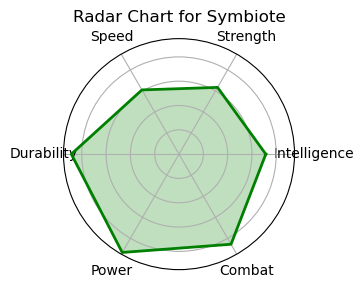

In [39]:
race_attributes_sum = df_top_5_race.groupby('race').sum()

attributes = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']

num_attributes = len(attributes)

for race in race_attributes_sum.index:
    values = race_attributes_sum.loc[race, attributes].values
    
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
    
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='green', alpha=0.25)
    ax.plot(angles, values, color='green', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_title(f'Radar Chart for {race}')
    ax.grid(True)
    
    plt.show()

In [8]:
df_top_10_overall_good

,name,Id,Intelligence,Strength,Speed,Durability,Power,Combat,Overall_ps
0,Martian Manhunter,432,100,95,92,100,100,85,572
1,Supergirl,643,94,100,100,100,100,75,569
2,Power Girl,524,94,100,100,100,100,75,569
3,Wonder Woman,720,88,100,79,100,100,100,567
4,Phoenix,517,100,100,83,100,100,80,563
5,Spectre,613,88,100,100,100,100,70,558
6,Thor,659,69,100,83,100,100,100,552
7,Captain Marvel,156,88,100,88,95,100,75,546
8,Nova,496,100,85,75,100,100,80,540
9,Hulk,332,88,100,63,100,98,85,534


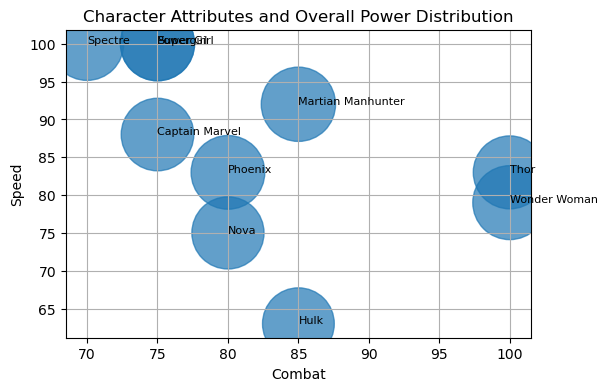

In [58]:
x_attribute = 'Combat'
y_attribute = 'Speed'
size_attribute = 'Overall_ps'

plt.figure(figsize=(6, 4))

plt.scatter(df_top_10_overall_good[x_attribute], df_top_10_overall_good[y_attribute], s=df_top_10_overall_good[size_attribute]*5, alpha=0.7)

plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title('Character Attributes and Overall Power Distribution')

for i, txt in enumerate(df_top_10_overall_good['name']):
    plt.annotate(txt, (df_top_10_overall_good[x_attribute][i], df_top_10_overall_good[y_attribute][i]), fontsize=8)

plt.grid(True)
plt.show()

In [9]:
df_top_10_overall

,Id,Name,Id.1,Intelligence,Strength,Speed,Durability,Power,Combat,Overall_ps,Id.2,Gender,Race,Height,Weight
0,426,Man of Miracles,426,100,100,100,100,100,100,600,426,-,God / Eternal,0 cm,0 kg
1,503,One-Above-All,503,100,100,100,100,100,100,600,503,-,Cosmic Entity,0 cm,0 kg
2,278,General Zod,278,94,100,96,100,100,95,585,278,Male,Kryptonian,0 cm,0 kg
3,80,Beyonder,80,100,100,100,100,100,84,584,80,Male,God / Eternal,0 cm,0 kg
4,642,Superboy-Prime,642,94,100,100,100,100,85,579,642,Male,Kryptonian,180 cm,77 kg
5,644,Superman,644,94,100,100,100,100,85,579,644,Male,Kryptonian,191 cm,101 kg
6,637,Steppenwolf,637,94,100,83,100,100,100,577,637,Male,New God,183 cm,91 kg
7,432,Martian Manhunter,432,100,95,92,100,100,85,572,432,Male,Martian,201 cm,135 kg
8,524,Power Girl,524,94,100,100,100,100,75,569,524,Female,Kryptonian,180 cm,81 kg
9,643,Supergirl,643,94,100,100,100,100,75,569,643,Female,Kryptonian,165 cm,54 kg


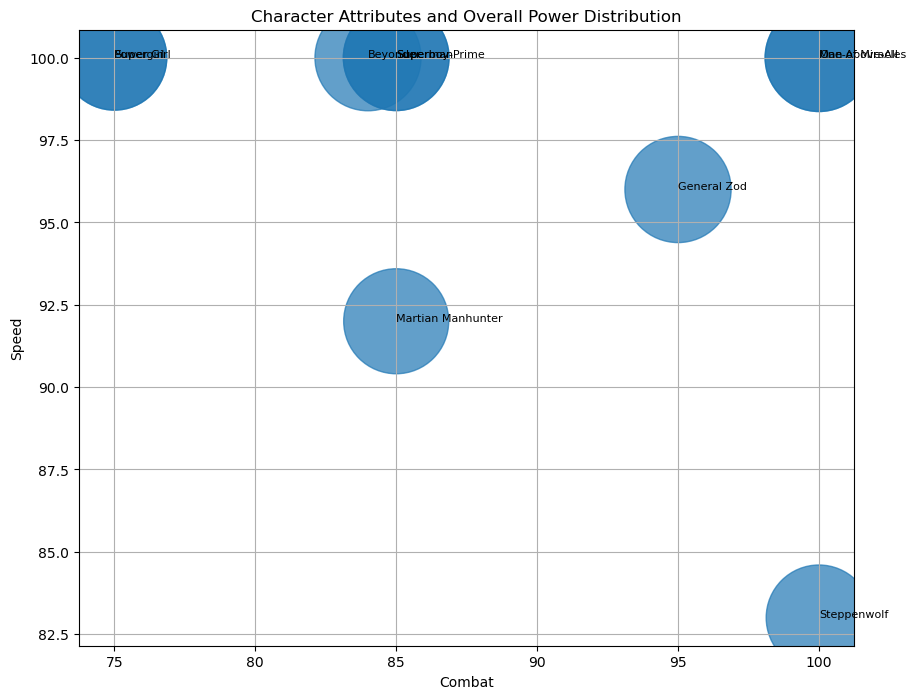

In [52]:
x_attribute = 'Combat'
y_attribute = 'Speed'
size_attribute = 'Overall_ps'

plt.figure(figsize=(10, 8))

plt.scatter(df_top_10_overall[x_attribute], df_top_10_overall[y_attribute], s=df_top_10_overall[size_attribute]*10, alpha=0.7)

plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title('Character Attributes and Overall Power Distribution')

for i, txt in enumerate(df_top_10_overall['Name']):
    plt.annotate(txt, (df_top_10_overall[x_attribute][i], df_top_10_overall[y_attribute][i]), fontsize=8)

plt.grid(True)
plt.show()


In [ ]:
df_top_10_races_with_more

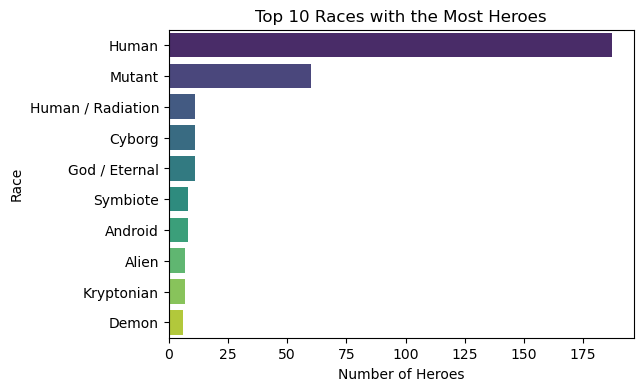

In [44]:
df_top_10_sorted = df_top_10_races_with_more.sort_values(by='num_heroes', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='num_heroes', y='race', data=df_top_10_sorted, palette='viridis')
plt.xlabel('Number of Heroes')
plt.ylabel('Race')
plt.title('Top 10 Races with the Most Heroes')
plt.show()

In [11]:
df_top_10_villains_overall

,name,Id,Intelligence,Strength,Speed,Durability,Power,Combat,Overall_ps
0,Superboy-Prime,642,94,100,100,100,100,85,579
1,Darkseid,204,88,100,83,100,100,95,566
2,Amazo,20,63,100,83,100,100,100,546
3,Faora,253,88,95,75,100,98,90,546
4,Cyborg Superman,195,75,93,92,100,100,80,540
5,Doomsday,230,75,100,67,100,100,90,532
6,Cheetah III,174,88,100,88,80,78,95,529
7,Apocalypse,35,100,100,33,100,100,60,493
8,Abraxas,5,88,63,83,100,100,55,489
9,Brainiac,136,100,95,63,90,60,75,483
